<h1>Newark Population - LINEAR REGRESSION how is Newar growing</h1> 



In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Newark Poplation Trend

In [20]:
df = pd.read_csv("newarkpopulationtrend.csv")

# take a look at the dataset
df

,Year,Population
0,2017,285154
1,2016,284386
2,2015,282854
3,2014,281660
4,2013,280005
5,2012,278790
6,2011,278078
7,2010,277332
8,2000,273546
9,1990,275221


just list 9.

In [21]:
cdf = df[['Year', 'Population']]
cdf.head(9)

,Year,Population
0,2017,285154
1,2016,284386
2,2015,282854
3,2014,281660
4,2013,280005
5,2012,278790
6,2011,278078
7,2010,277332
8,2000,273546


## Newark Population History

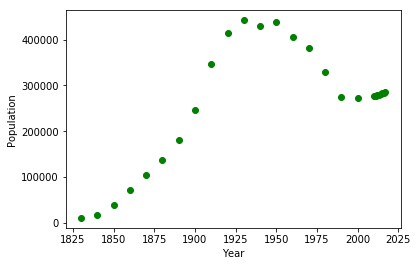

In [22]:
plt.scatter(cdf.Year, cdf.Population,  color='green')
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

#### Train and test!!


In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="Newark polynomial_regression">Polynomial regression</h2>

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Year']])
train_y = np.asanyarray(train[['Population']])

test_x = np.asanyarray(test[['Year']])
test_y = np.asanyarray(test[['Population']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000000e+00, 2.017000e+03, 4.068289e+06],
       [1.000000e+00, 2.016000e+03, 4.064256e+06],
       [1.000000e+00, 2.015000e+03, 4.060225e+06],
       [1.000000e+00, 2.014000e+03, 4.056196e+06],
       [1.000000e+00, 2.012000e+03, 4.048144e+06],
       [1.000000e+00, 2.011000e+03, 4.044121e+06],
       [1.000000e+00, 2.010000e+03, 4.040100e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.990000e+03, 3.960100e+06],
       [1.000000e+00, 1.980000e+03, 3.920400e+06],
       [1.000000e+00, 1.970000e+03, 3.880900e+06],
       [1.000000e+00, 1.960000e+03, 3.841600e+06],
       [1.000000e+00, 1.950000e+03, 3.802500e+06],
       [1.000000e+00, 1.940000e+03, 3.763600e+06],
       [1.000000e+00, 1.930000e+03, 3.724900e+06],
       [1.000000e+00, 1.920000e+03, 3.686400e+06],
       [1.000000e+00, 1.910000e+03, 3.648100e+06],
       [1.000000e+00, 1.900000e+03, 3.610000e+06],
       [1.000000e+00, 1.890000e+03, 3.572100e+06],
       [1.000000e+00, 1.880000e

In [25]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  1.16333292e+05 -2.97725426e+01]]
Intercept:  [-1.13257126e+08]


Text(0, 0.5, 'Population')

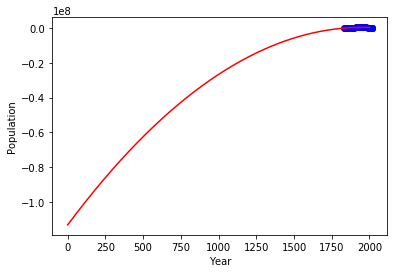

In [26]:
plt.scatter(train.Year, train.Population,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
XX = np.arange(0.0, 2000.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Year")
plt.ylabel("Population")

<h2 id="evaluation">Evaluation</h2>

In [27]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 35527.58
Residual sum of squares (MSE): 2414114996.26
R2-score: 0.11
